<a href="https://colab.research.google.com/github/lmcanavals/topics/blob/main/04_2_TopicosCC_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from random import *

In [3]:
def generarGrafoAleatorio(n,m):
  g = [[] for _ in range(n)]
  for i in range(m):#para la cantidad de aristas
    v1 = randint(0,n-1)#elegir aleatoriamente el vertice 1
    v2 = randint(0,n-1)#elegir aleatoriamente el vertice 2
    #evitar repetir aristas
    while v1 == v2 or v2 in g[v1]: #si se detecta que v1==2 o v2 ya es vecino de v1
      v1 = randint(0,n-1)
      v2 = randint(0,n-1)
    g[v1] += [v2] #g[v1].append(v2) #agregar el v2 al vecindario del v1
    g[v2] += [v1] #g[v2].append(v1) #agregar el v1 al vecindario del v2
  return g

generarGrafoAleatorio(10,30)

[[7, 1, 6, 4, 8, 5, 3],
 [4, 0, 3, 2, 6, 8, 5],
 [7, 4, 1, 3, 8],
 [7, 9, 8, 1, 5, 4, 2, 0],
 [1, 6, 2, 0, 3],
 [3, 6, 0, 8, 9, 1],
 [4, 0, 1, 5, 8, 9],
 [0, 3, 2, 9],
 [9, 3, 0, 5, 6, 1, 2],
 [8, 3, 7, 6, 5]]

[[12, 3, 15], [16], [6, 5, 19, 7], [0, 4, 5, 7, 12], [14, 19, 3], [13, 2, 3, 14], [15, 2, 14, 10], [9, 13, 2, 3], [10, 19], [19, 11, 7, 14, 18], [8, 14, 6, 16, 15], [17, 13, 9], [0, 14, 15, 3], [11, 5, 16, 7], [6, 4, 19, 12, 10, 9, 5], [16, 6, 0, 12, 10, 18], [15, 13, 19, 1, 10], [11], [19, 15, 9], [18, 4, 14, 9, 2, 16, 8]]


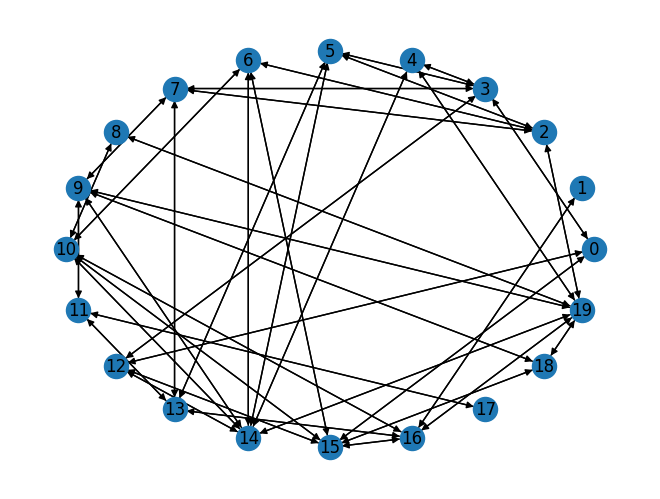

In [4]:
import networkx as nx

n = 20
m = 40
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)
#plotear grafo con disposición circular
nx.draw_circular(G, with_labels=True)

In [4]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [6]:
from ortools.sat.python import cp_model

#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,4,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])

[color_nodo_0(1..4), color_nodo_1(1..4), color_nodo_2(1..4), color_nodo_3(1..4), color_nodo_4(1..4), color_nodo_5(1..4), color_nodo_6(1..4), color_nodo_7(1..4), color_nodo_8(1..4), color_nodo_9(1..4), color_nodo_10(1..4), color_nodo_11(1..4), color_nodo_12(1..4), color_nodo_13(1..4), color_nodo_14(1..4), color_nodo_15(1..4), color_nodo_16(1..4), color_nodo_17(1..4), color_nodo_18(1..4), color_nodo_19(1..4), color_nodo_20(1..4), color_nodo_21(1..4), color_nodo_22(1..4), color_nodo_23(1..4), color_nodo_24(1..4), color_nodo_25(1..4), color_nodo_26(1..4), color_nodo_27(1..4), color_nodo_28(1..4), color_nodo_29(1..4), color_nodo_30(1..4), color_nodo_31(1..4), color_nodo_32(1..4), color_nodo_33(1..4), color_nodo_34(1..4), color_nodo_35(1..4), color_nodo_36(1..4), color_nodo_37(1..4), color_nodo_38(1..4), color_nodo_39(1..4), color_nodo_40(1..4), color_nodo_41(1..4), color_nodo_42(1..4), color_nodo_43(1..4), color_nodo_44(1..4), color_nodo_45(1..4), color_nodo_46(1..4), color_nodo_47(1..4), c

In [10]:
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

Nodo 0 de color 4
Nodo 1 de color 3
Nodo 2 de color 3
Nodo 3 de color 1
Nodo 4 de color 3
Nodo 5 de color 1
Nodo 6 de color 3
Nodo 7 de color 2
Nodo 8 de color 1
Nodo 9 de color 1
Nodo 10 de color 2
Nodo 11 de color 4
Nodo 12 de color 1
Nodo 13 de color 2
Nodo 14 de color 3
Nodo 15 de color 2
Nodo 16 de color 1
Nodo 17 de color 2
Nodo 18 de color 1
Nodo 19 de color 1


[(0.9135163850827802, 0.27805317526712536, 0.7073291005558997), (0.3548039035958557, 0.67869386702311, 0.29405751348702547), (0.7336106785454641, 0.14899479021259077, 0.8651932477633085), (0.8943311883754954, 0.02730117331503079, 0.9398760271474559), (0.6874358033335912, 0.6399807741349436, 0.9398710842321382), (0.7133195148779455, 0.5661689600695626, 0.774636699352064), (0.8989273145048584, 0.5375273093129465, 0.6972132390285162), (0.9718785538123633, 0.610800405863483, 0.8828693653395547), (0.07276690616541004, 0.7699617595689867, 0.7792999659092797), (0.2532886130162364, 0.30545548835459513, 0.9034625964108248), (0.012563588462692454, 0.7043472264597934, 0.35735885108540877), (0.16966396457812793, 0.9083063504858049, 0.24323434214769357), (0.12298280819519136, 0.08597900931635138, 0.5334069673103327), (0.6902687964379365, 0.9462197793838182, 0.7984070674056032), (0.13014686996681102, 0.3999373140816812, 0.6903705660442347), (0.9778234348663195, 0.4602358918582743, 0.2894847367704478

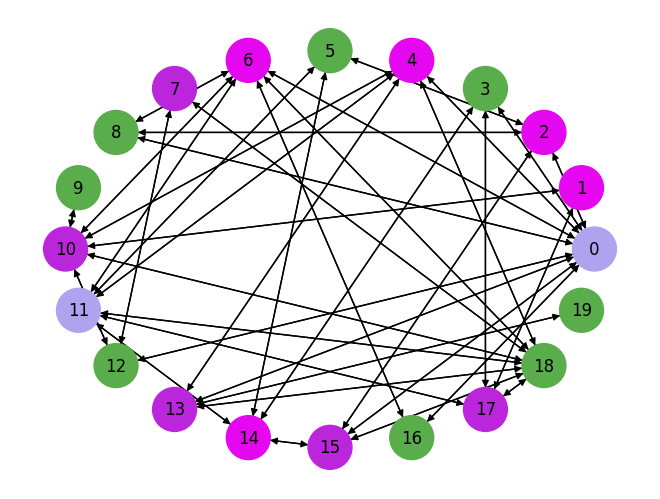

In [11]:
colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

[[20, 17, 14, 41, 3, 15, 25], [10, 30, 3, 42, 11, 26], [14, 17, 43, 21, 11, 13, 18, 37, 3], [5, 1, 20, 0, 35, 41, 21, 39, 19, 31, 6, 2, 36, 32], [42, 47, 9, 35], [35, 3, 13, 17, 43, 28, 14, 42], [49, 45, 41, 19, 3], [36, 46, 33, 25, 42, 26, 20, 24, 19, 37], [45, 22, 15, 14, 36, 32, 31], [16, 35, 22, 4], [1, 11, 49, 12, 33, 22, 29, 47, 38, 46, 19, 21], [36, 10, 21, 20, 2, 41, 23, 40, 1, 13], [10, 15, 48, 42, 46, 31, 24, 26, 44], [18, 35, 5, 19, 49, 41, 2, 11], [2, 26, 43, 0, 32, 5, 49, 8, 15, 39], [46, 8, 12, 38, 39, 31, 14, 18, 0, 33], [38, 48, 36, 33, 9, 43, 34, 44, 21, 32], [2, 45, 0, 5, 27], [13, 26, 39, 38, 27, 2, 15, 40, 37, 47], [13, 49, 21, 39, 38, 3, 7, 6, 36, 10, 45], [0, 11, 3, 7, 43], [37, 2, 11, 19, 3, 16, 43, 10], [36, 8, 10, 30, 37, 9, 38, 47, 45], [30, 27, 46, 11, 25], [41, 32, 44, 29, 7, 12, 47], [49, 7, 42, 34, 23, 0], [14, 30, 18, 45, 7, 12, 1, 35, 41, 36], [23, 48, 35, 18, 17, 36, 31], [44, 36, 5, 49], [35, 24, 10, 46, 33, 32], [23, 45, 1, 43, 26, 35, 22, 40, 42, 36]

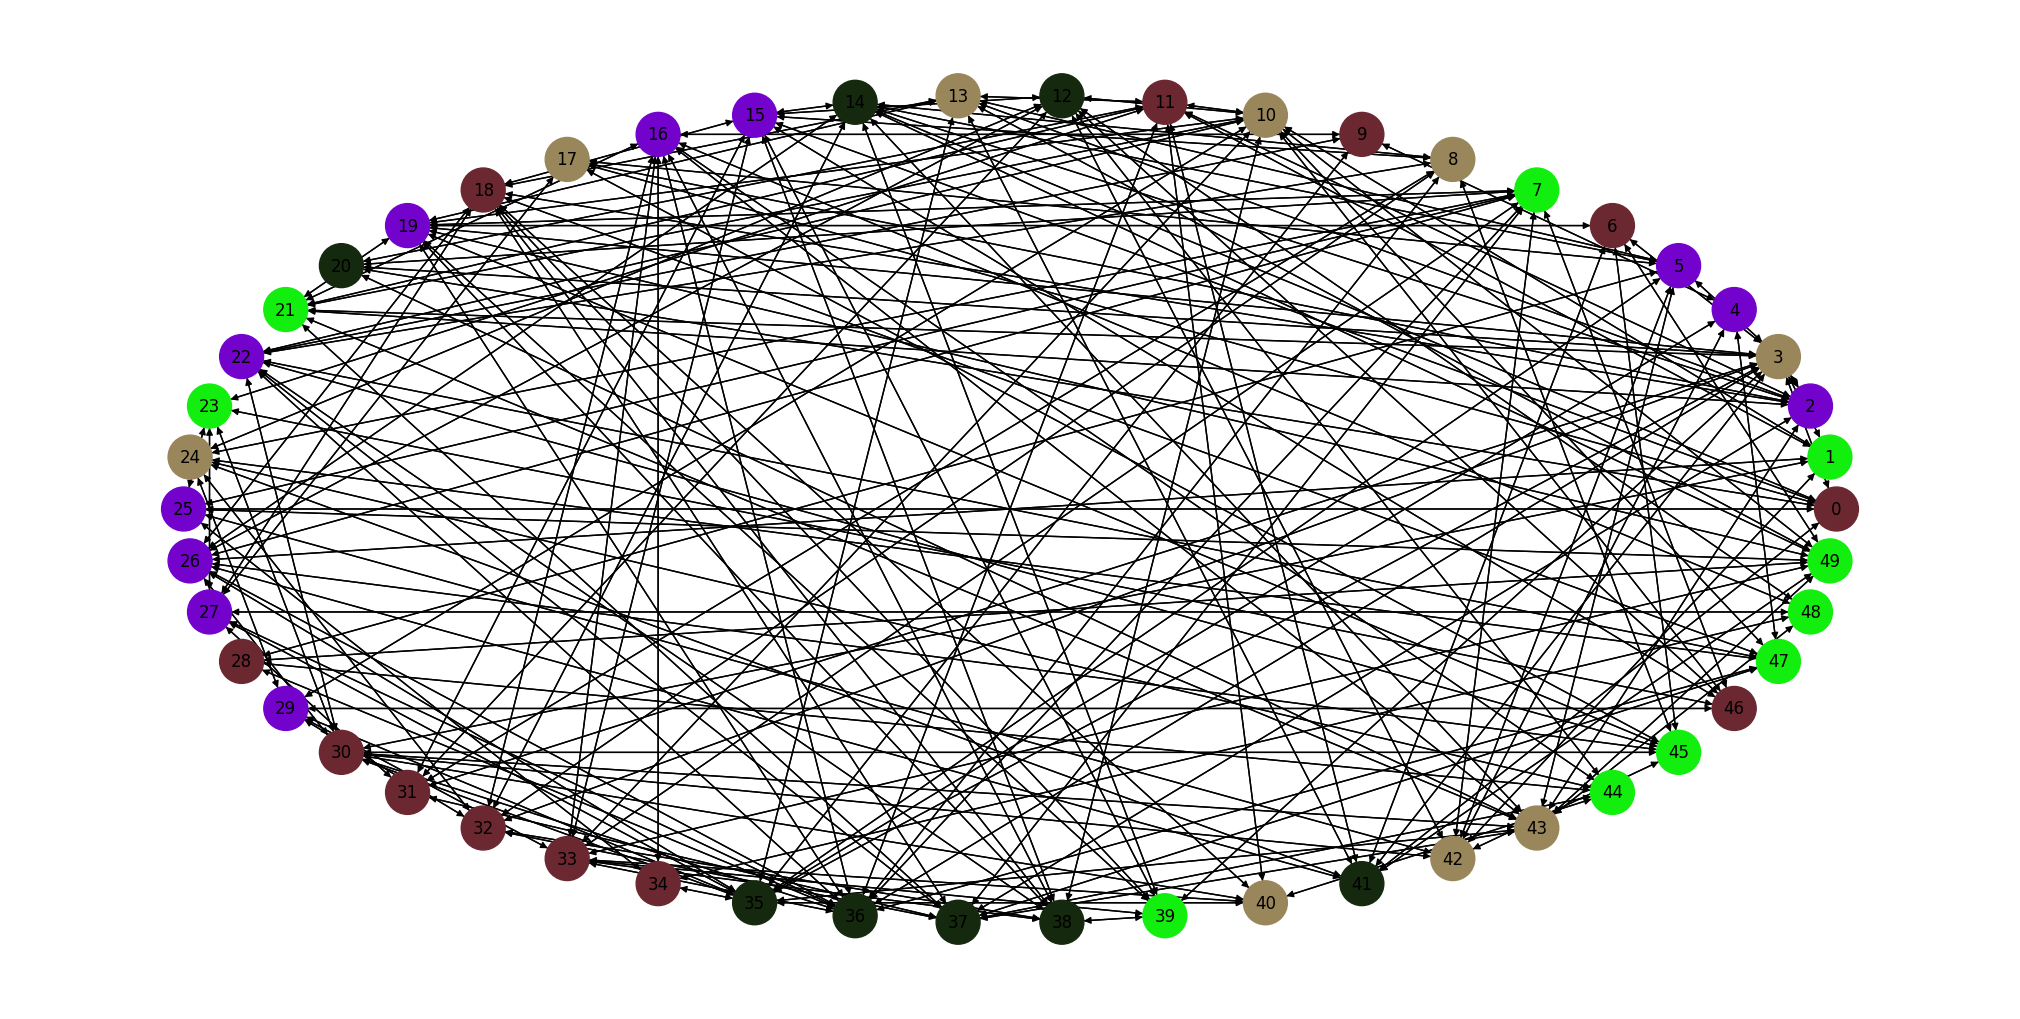

In [8]:
import matplotlib.pyplot as plt

n = 50
m = 200
#generar grafo como lista de listas
grafo = generarGrafoAleatorio(n,m)
print(grafo)
#crear grafo
G = nx.DiGraph()
#agregar nodos
for u in range(len(grafo)):
  G.add_node(u)
#agregar aristas
for u in range(len(grafo)):
  for v in grafo[u]:
    G.add_edge(u,v)
  
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,5,'color_nodo_'+str(i)) for i in range(n)]
print(color)
#restricciones
for u in range(len(grafo)):
  for v in grafo[u]:
    model.Add(color[u] != color[v])
#crear solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = [] #lista de colores asignados a los nodos
if status == cp_model.OPTIMAL:
  for u in range(len(grafo)):
    #print("Nodo",u,'de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]
else:
    print("No can do")

colors = [(random(),random(),random()) for i in range(n)]
print(colors)

G1 = nx.DiGraph()
for u in range(len(grafo)):
  G1.add_node(u)
for u in range(len(grafo)):
  for v in grafo[u]:
    G1.add_edge(u,v)

plt.figure(figsize=(20,10))
nx.draw_circular(G1, with_labels=True, node_color=[colors[x] for x in c], node_size=1000)

In [9]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 81.4 MB/s eta 0:00:00


In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [11]:
url_data = 'https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson'

In [12]:
region_geojson = gpd.read_file(url_data)
region_geojson.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


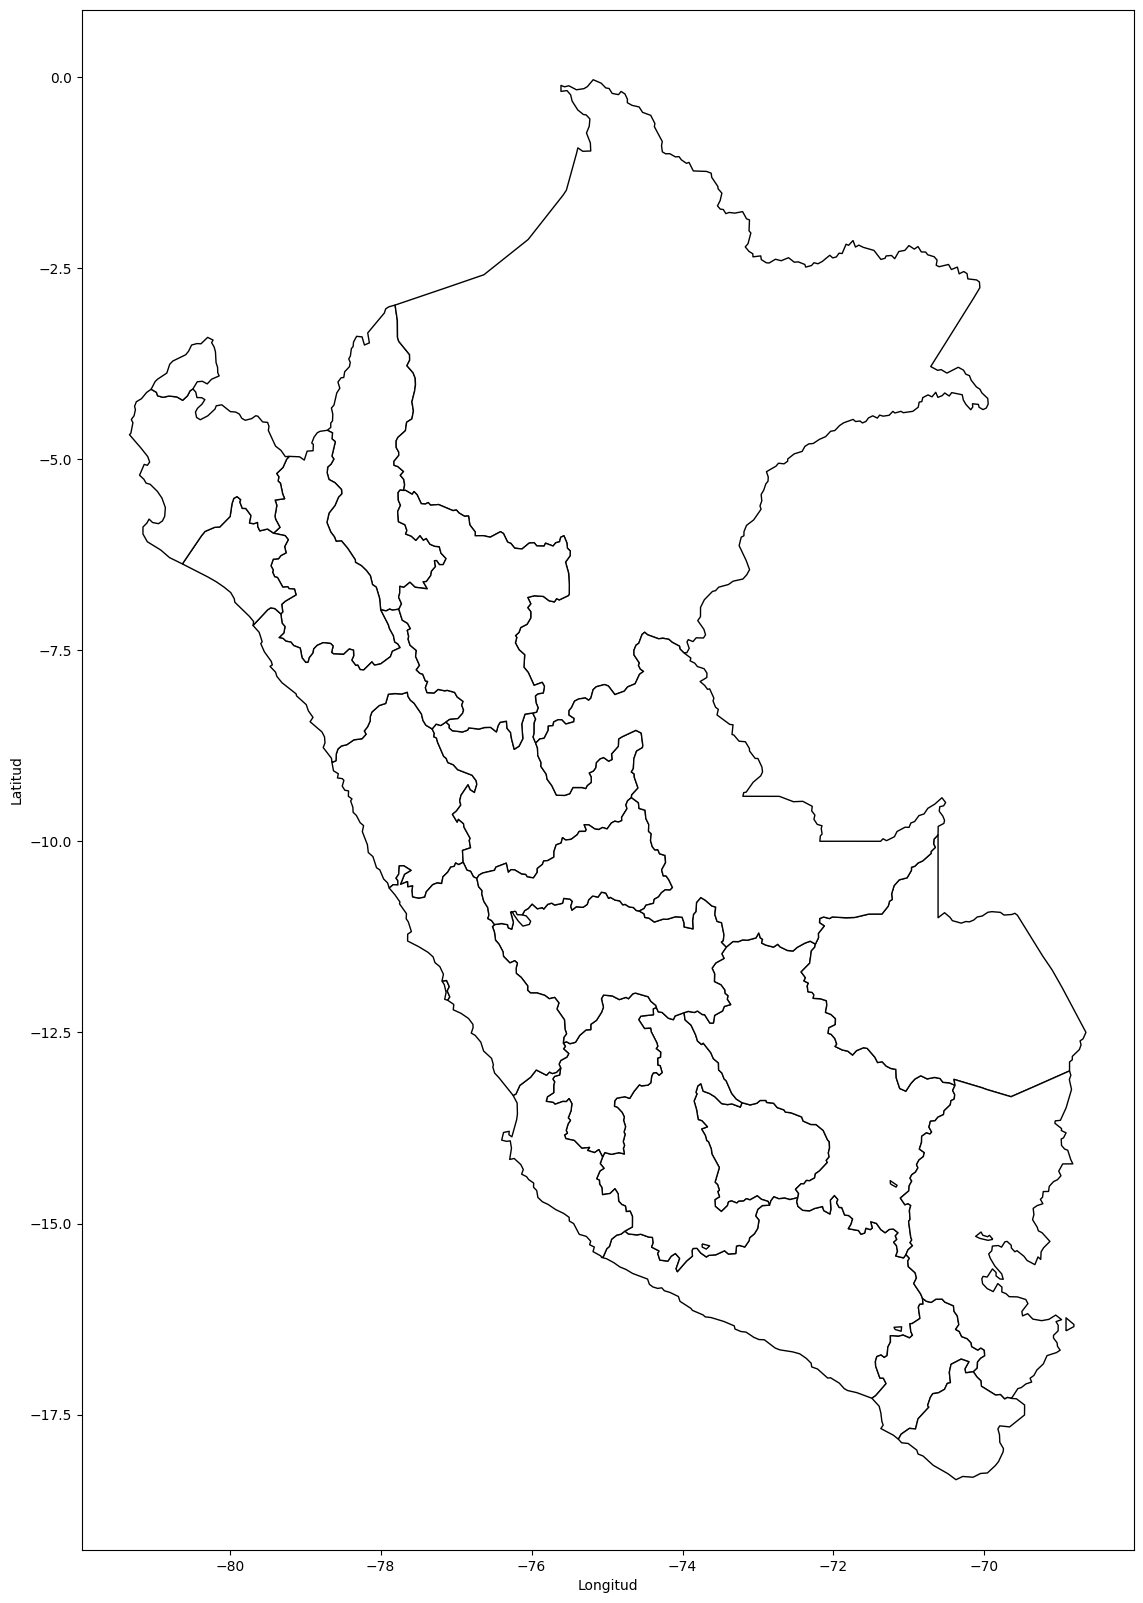

In [13]:
from matplotlib.colors import ListedColormap

#lista de 25 colores en blanco
cmap = ListedColormap(['white' for _ in range(25)],name='test')

#plotear la figura con esa lista y lineas de color negro
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
#etiquetas de la figura
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [14]:
regiones = list(region_geojson['NOMBDEP'].values)
print(regiones)

['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO', 'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI']


In [19]:
grafo_regional = [[15,21,12,5],[12,9,14],[7,3,4],
                  [17,20,7,2,4,10],[11,8,10,7,2,3],[19,13,12,0],
                  [14],[24,16,20,3,2,4,11],[10,14,11,4,3],
                  [1,12,21,24,18,14,15],[14,8,4,3],[14,18,24,7,4,8],
                  [13,5,0,21,9,1],[19,5,12],[1,9,18,11,8,10,6],
                  [0,21,24,9],[24,20,7],[3,20,22],
                  [9,14,24,11],[23,13,5],[7,16,17,22,3],
                  [0,15,24,9,1,12],[17,20],[19],[15,9,18,11,7,16]]
for u in range(len(grafo_regional)):
  print(f"{regiones[u]:15}",[regiones[v] for v in grafo_regional[u]])

AMAZONAS        ['LORETO', 'SAN MARTIN', 'LA LIBERTAD', 'CAJAMARCA']
ANCASH          ['LA LIBERTAD', 'HUANUCO', 'LIMA']
APURIMAC        ['CUSCO', 'AREQUIPA', 'AYACUCHO']
AREQUIPA        ['MOQUEGUA', 'PUNO', 'CUSCO', 'APURIMAC', 'AYACUCHO', 'ICA']
AYACUCHO        ['JUNIN', 'HUANCAVELICA', 'ICA', 'CUSCO', 'APURIMAC', 'AREQUIPA']
CAJAMARCA       ['PIURA', 'LAMBAYEQUE', 'LA LIBERTAD', 'AMAZONAS']
CALLAO          ['LIMA']
CUSCO           ['UCAYALI', 'MADRE DE DIOS', 'PUNO', 'AREQUIPA', 'APURIMAC', 'AYACUCHO', 'JUNIN']
HUANCAVELICA    ['ICA', 'LIMA', 'JUNIN', 'AYACUCHO', 'AREQUIPA']
HUANUCO         ['ANCASH', 'LA LIBERTAD', 'SAN MARTIN', 'UCAYALI', 'PASCO', 'LIMA', 'LORETO']
ICA             ['LIMA', 'HUANCAVELICA', 'AYACUCHO', 'AREQUIPA']
JUNIN           ['LIMA', 'PASCO', 'UCAYALI', 'CUSCO', 'AYACUCHO', 'HUANCAVELICA']
LA LIBERTAD     ['LAMBAYEQUE', 'CAJAMARCA', 'AMAZONAS', 'SAN MARTIN', 'HUANUCO', 'ANCASH']
LAMBAYEQUE      ['PIURA', 'CAJAMARCA', 'LA LIBERTAD']
LIMA            ['ANCASH', 'HU

In [22]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,4,'color_region_'+str(i)) for i in range(25)]
#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])

In [25]:
#crear solver 
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  for u in range(len(grafo_regional)):
    print(f"Region {u:2} {regiones[u]:15} de color {solver.Value(color[u])}")
    c += [solver.Value(color[u])]

Region  0 AMAZONAS        de color 4
Region  1 ANCASH          de color 3
Region  2 APURIMAC        de color 2
Region  3 AREQUIPA        de color 4
Region  4 AYACUCHO        de color 1
Region  5 CAJAMARCA       de color 3
Region  6 CALLAO          de color 2
Region  7 CUSCO           de color 3
Region  8 HUANCAVELICA    de color 3
Region  9 HUANUCO         de color 4
Region 10 ICA             de color 2
Region 11 JUNIN           de color 4
Region 12 LA LIBERTAD     de color 1
Region 13 LAMBAYEQUE      de color 2
Region 14 LIMA            de color 1
Region 15 LORETO          de color 3
Region 16 MADRE DE DIOS   de color 4
Region 17 MOQUEGUA        de color 3
Region 18 PASCO           de color 2
Region 19 PIURA           de color 1
Region 20 PUNO            de color 2
Region 21 SAN MARTIN      de color 2
Region 22 TACNA           de color 1
Region 23 TUMBES          de color 2
Region 24 UCAYALI         de color 1


Hay 25 regiones con colores: [4, 3, 2, 4, 1, 3, 2, 3, 3, 4, 2, 4, 1, 2, 1, 3, 4, 3, 2, 1, 2, 2, 1, 2, 1]
Hay 4 colores únicos: {1, 2, 3, 4}


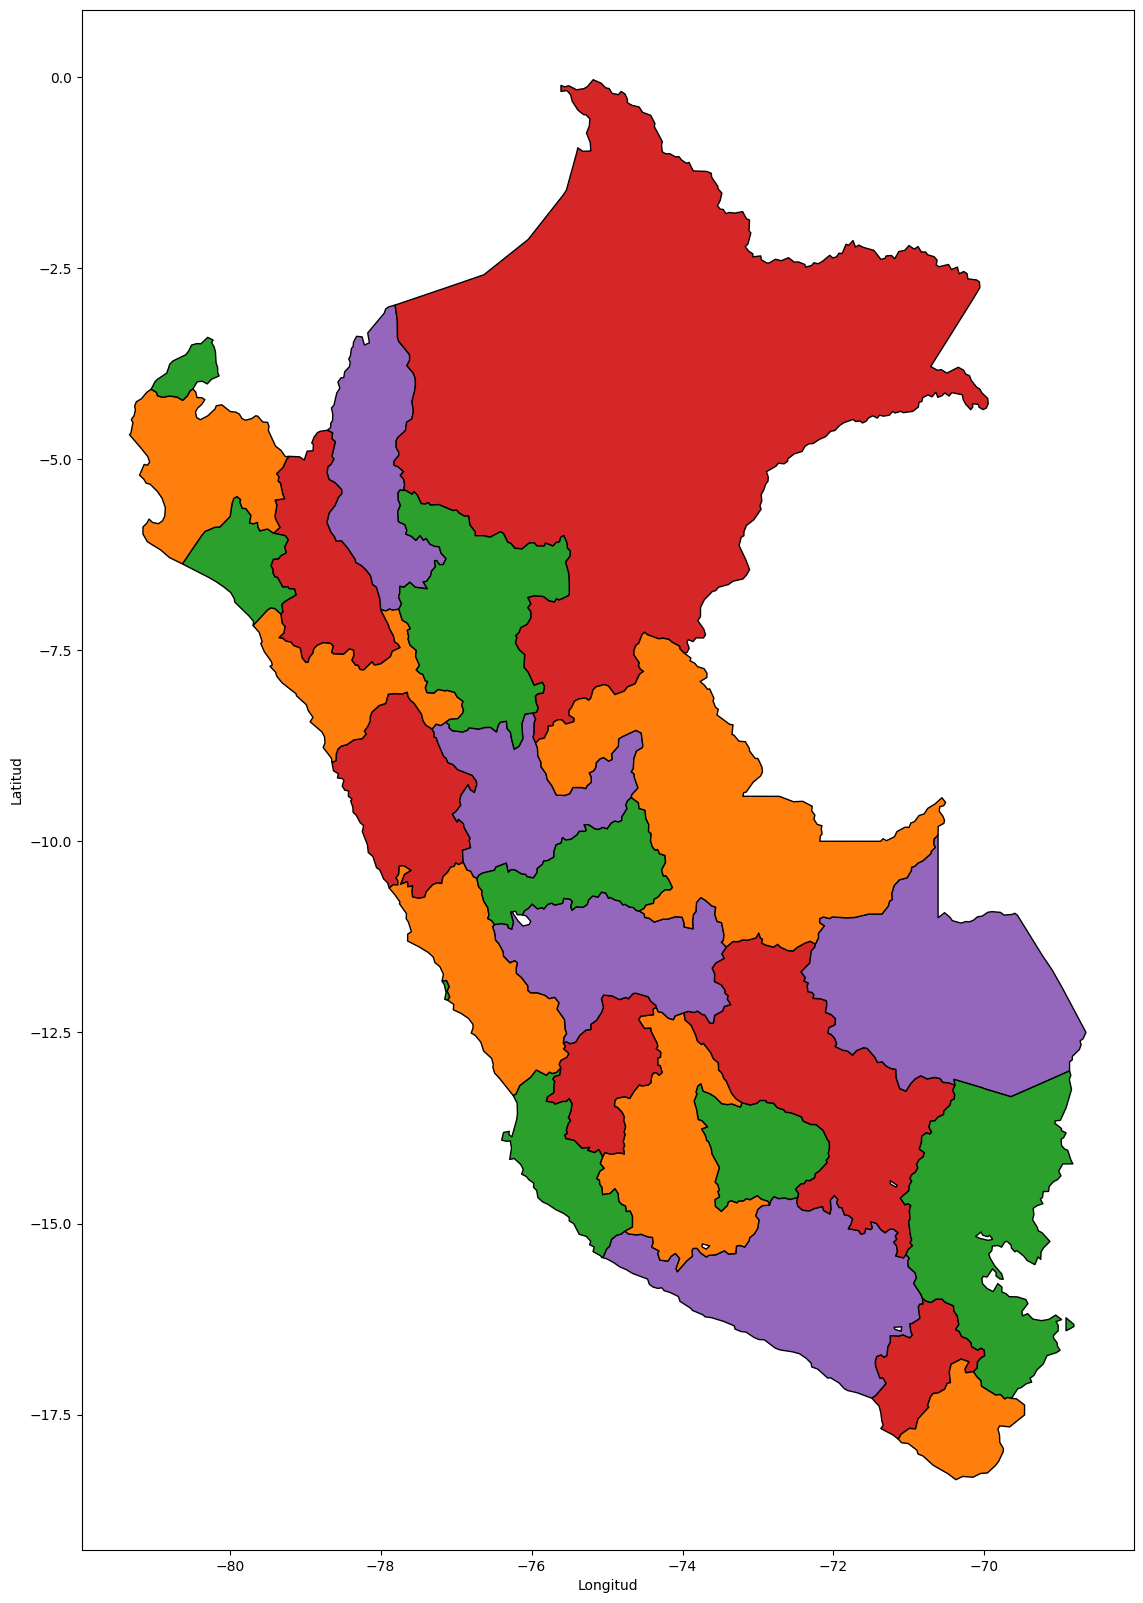

In [28]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd",
                   "#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"]

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [32]:
#crear CSP
model = cp_model.CpModel()
#variables y dominios
#color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(25)]

nc = []
for i in range(25):
  fila = []
  for j in range(25):
    fila += [model.NewBoolVar('color_'+str(i)+'_'+str(j))]
  nc += [fila]
print(nc)

usocolor = []
for j in range(25):
  usocolor += [model.NewBoolVar('usocolor'+str(j))]
  col = [nc[i][j] for i in range(25)]
  model.Add(sum(col) > 0).OnlyEnforceIf(usocolor[j])
  model.Add(sum(col) == 0).OnlyEnforceIf(usocolor[j].Not())

numerocolores = model.NewIntVar(1,25,'numerocolores')
model.Add(sum(usocolor) == numerocolores)

color = []
for i in range(25):  
  color += [model.NewIntVar(1,10,'color_region_'+str(i))]
  for j in range(25):
    model.Add(color[i] == j+1).OnlyEnforceIf(nc[i][j])
    model.Add(color[i] != j+1).OnlyEnforceIf(nc[i][j].Not())

#restricciones
for u in range(len(grafo_regional)):
  for v in grafo_regional[u]:
    model.Add(color[u] != color[v])    

#función objetivo
model.Minimize(numerocolores)

[[color_0_0(0..1), color_0_1(0..1), color_0_2(0..1), color_0_3(0..1), color_0_4(0..1), color_0_5(0..1), color_0_6(0..1), color_0_7(0..1), color_0_8(0..1), color_0_9(0..1), color_0_10(0..1), color_0_11(0..1), color_0_12(0..1), color_0_13(0..1), color_0_14(0..1), color_0_15(0..1), color_0_16(0..1), color_0_17(0..1), color_0_18(0..1), color_0_19(0..1), color_0_20(0..1), color_0_21(0..1), color_0_22(0..1), color_0_23(0..1), color_0_24(0..1)], [color_1_0(0..1), color_1_1(0..1), color_1_2(0..1), color_1_3(0..1), color_1_4(0..1), color_1_5(0..1), color_1_6(0..1), color_1_7(0..1), color_1_8(0..1), color_1_9(0..1), color_1_10(0..1), color_1_11(0..1), color_1_12(0..1), color_1_13(0..1), color_1_14(0..1), color_1_15(0..1), color_1_16(0..1), color_1_17(0..1), color_1_18(0..1), color_1_19(0..1), color_1_20(0..1), color_1_21(0..1), color_1_22(0..1), color_1_23(0..1), color_1_24(0..1)], [color_2_0(0..1), color_2_1(0..1), color_2_2(0..1), color_2_3(0..1), color_2_4(0..1), color_2_5(0..1), color_2_6(0.

In [33]:
#crear solver 
solver = cp_model.CpSolver()
status = solver.Solve(model)

c = []
if status == cp_model.OPTIMAL:
  print("El número de colores es",solver.Value(numerocolores))
  for i in range(len(grafo_regional)):
    for j in range(len(grafo_regional)):
      print(solver.Value(nc[i][j]),end=' ')
    print()
  print()
  for i in range(len(grafo_regional)):
    print(solver.Value(usocolor[i]),end=' ')
  print()
  for u in range(len(grafo_regional)):
    print('Region',u,'(',regiones[u],')','de color',solver.Value(color[u]))
    c += [solver.Value(color[u])]

El número de colores es 4
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1 0 0

Hay 25 regiones con colores: [3, 3, 3, 4, 1, 2, 2, 2, 2, 4, 3, 4, 1, 4, 1, 1, 1, 1, 2, 1, 3, 2, 2, 3, 3]
Hay 4 colores únicos: {1, 2, 3, 4}


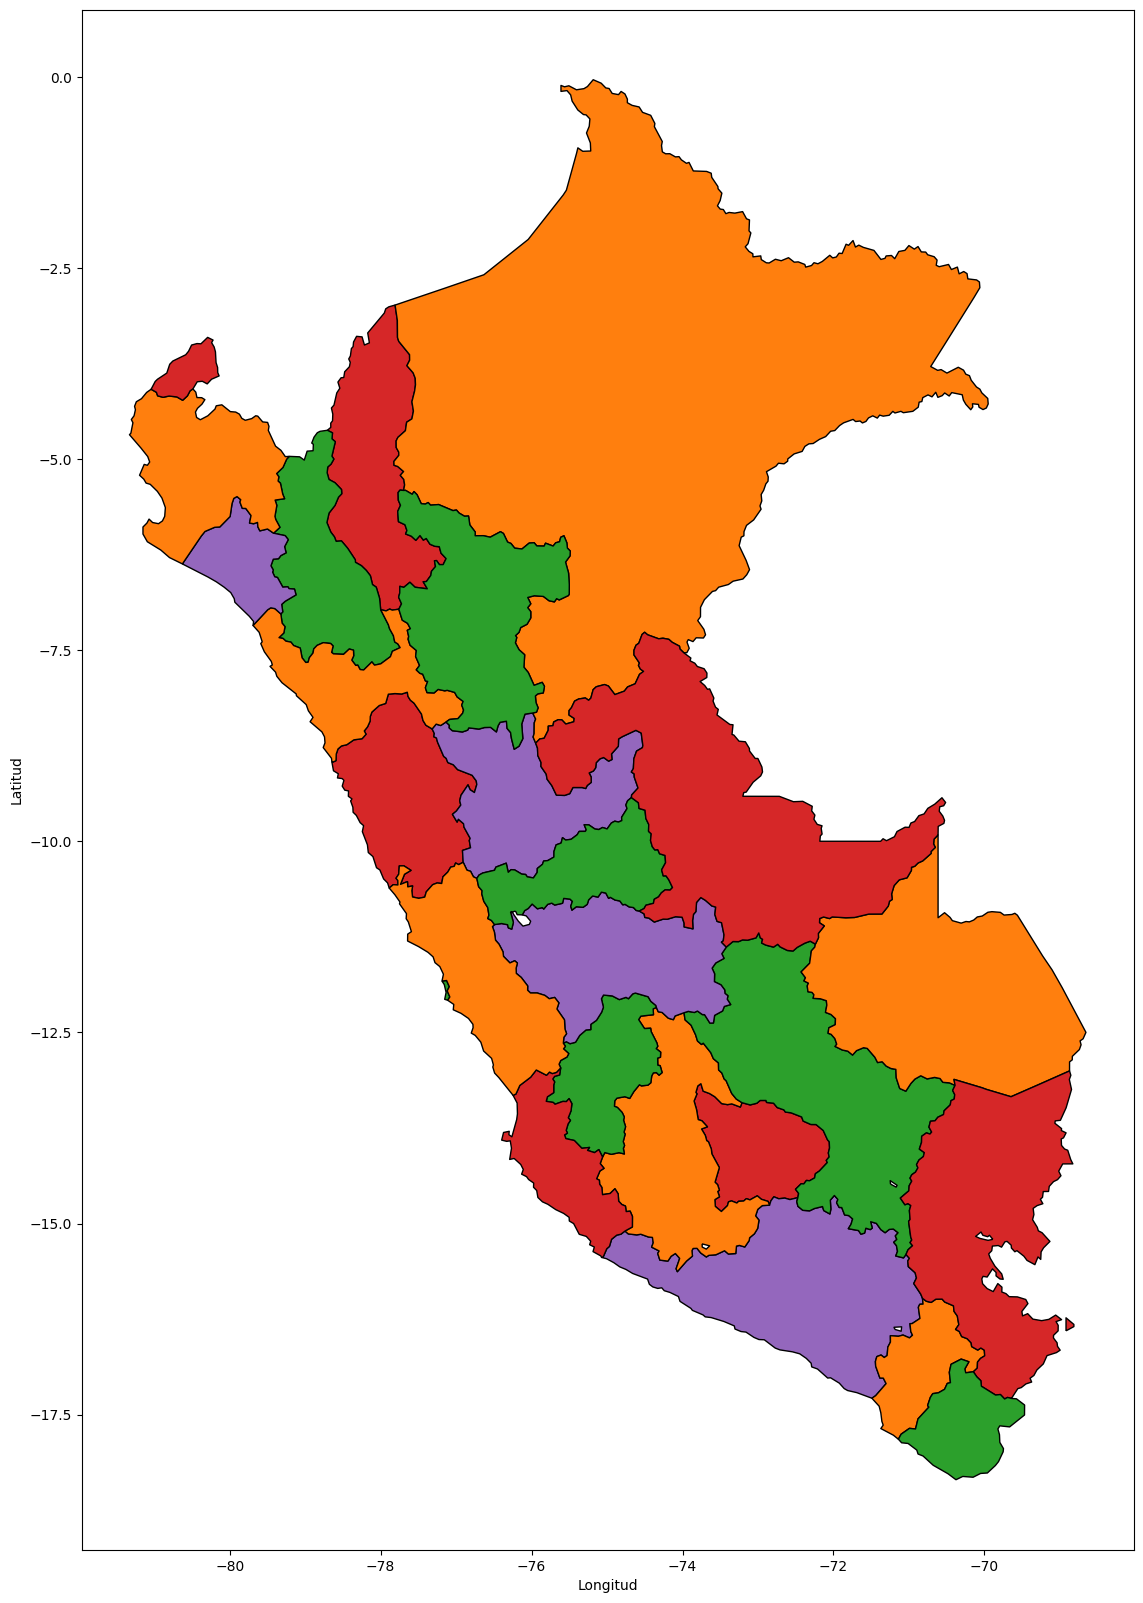

In [34]:
#imprimir cantidad de colores
print('Hay',len(c),'regiones con colores:',c)
print('Hay',len(set(c)),'colores únicos:',set(c))
#plotear
colors_regiones = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd",
                   "#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"]

cmap = ListedColormap([colors_regiones[c[i]] for i in range(25)],name='regions')
region_geojson.plot(figsize=(20,20),edgecolor='black',cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()